In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [5]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6, 4),index = dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.976958,0.979442,-0.501182,-0.062734
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921
2013-01-05,-1.551690,-0.637700,0.723891,0.267898
2013-01-06,0.418901,1.770744,1.557736,1.384581


In [12]:
#Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame(
        {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(4)), dtype="float32"),
            "D": np.array([3] * 4, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test", "train"]),
            "F": "foo",
       }
) 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [24]:
#Here is how to view the top and bottom rows of the frame:

df.head()

,A,B,C,D
2013-01-01,1.976958,0.979442,-0.501182,-0.062734
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921
2013-01-05,-1.551690,-0.637700,0.723891,0.267898


In [25]:
##Here is how to view  bottom rows of the frame:
df.tail()

,A,B,C,D
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921
2013-01-05,-1.551690,-0.637700,0.723891,0.267898
2013-01-06,0.418901,1.770744,1.557736,1.384581


In [27]:
#Display the index, columns:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [28]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [29]:
#to numpy
df.to_numpy()

array([[ 1.9769584 ,  0.97944209, -0.50118176, -0.0627336 ],
       [ 1.54640257, -0.3148467 ,  1.04103863, -0.24352843],
       [ 0.07781315,  0.20275515,  0.0495005 , -0.44184998],
       [ 0.1262688 , -0.54818032, -0.86487597, -1.70192102],
       [-1.55168957, -0.63770039,  0.72389087,  0.26789814],
       [ 0.4189006 ,  1.77074374,  1.55773583,  1.38458106]])

In [30]:
#the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [31]:
#desciption of data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.432442,0.242036,0.334351,-0.132926
std,1.247630,0.958202,0.934368,1.003776
min,-1.551690,-0.637700,-0.864876,-1.701921
25%,0.089927,-0.489847,-0.363511,-0.392270
50%,0.272585,-0.056046,0.386696,-0.153131
75%,1.264527,0.785270,0.961752,0.185240
max,1.976958,1.770744,1.557736,1.384581


In [34]:
#transposing of data
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.976958,1.546403,0.077813,0.126269,-1.551690,0.418901
B,0.979442,-0.314847,0.202755,-0.548180,-0.637700,1.770744
C,-0.501182,1.041039,0.049500,-0.864876,0.723891,1.557736
D,-0.062734,-0.243528,-0.441850,-1.701921,0.267898,1.384581


In [37]:
#sorting by axis

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.062734,-0.501182,0.979442,1.976958
2013-01-02,-0.243528,1.041039,-0.314847,1.546403
2013-01-03,-0.441850,0.049500,0.202755,0.077813
2013-01-04,-1.701921,-0.864876,-0.548180,0.126269
2013-01-05,0.267898,0.723891,-0.637700,-1.551690
2013-01-06,1.384581,1.557736,1.770744,0.418901


In [38]:
#sorting by values
df.sort_values("B")

,A,B,C,D
2013-01-05,-1.551690,-0.637700,0.723891,0.267898
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850
2013-01-01,1.976958,0.979442,-0.501182,-0.062734
2013-01-06,0.418901,1.770744,1.557736,1.384581


In [39]:
#Selecting a single column, which yields a Series, equivalent to df.A:
df["A"]

2013-01-01    1.976958
2013-01-02    1.546403
2013-01-03    0.077813
2013-01-04    0.126269
2013-01-05   -1.551690
2013-01-06    0.418901
Freq: D, Name: A, dtype: float64

In [41]:
#Selecting via [], which slices the rows.

df[0:3]

,A,B,C,D
2013-01-01,1.976958,0.979442,-0.501182,-0.062734
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850


In [43]:
df["20130102":"20130104"]#acc to date

,A,B,C,D
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921


In [46]:
#For getting a cross section using a label:
df.loc[dates[0]]

A    1.976958
B    0.979442
C   -0.501182
D   -0.062734
Name: 2013-01-01 00:00:00, dtype: float64

In [47]:
#Selecting on a multi-axis by label:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.976958,0.979442
2013-01-02,1.546403,-0.314847
2013-01-03,0.077813,0.202755
2013-01-04,0.126269,-0.548180
2013-01-05,-1.551690,-0.637700
2013-01-06,0.418901,1.770744


In [48]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.546403,-0.314847
2013-01-03,0.077813,0.202755
2013-01-04,0.126269,-0.548180


In [51]:
#Reduction in the dimensions of the returned object:
df.loc["20130102",["A","B"]]

A    1.546403
B   -0.314847
Name: 2013-01-02 00:00:00, dtype: float64

In [52]:
df.loc[dates[0], "A"]

1.9769584005479142

In [53]:
#For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0],"A"]

1.9769584005479142

In [56]:
#Select via the position of the passed integers:
df.iloc[3]

A    0.126269
B   -0.548180
C   -0.864876
D   -1.701921
Name: 2013-01-04 00:00:00, dtype: float64

In [57]:
#By integer slices, acting similar to numpy/Python:

df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.126269,-0.54818
2013-01-05,-1.551690,-0.63770


In [58]:
#By lists of integer position locations, similar to the NumPy/Python style:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.546403,1.041039
2013-01-03,0.077813,0.049500
2013-01-05,-1.551690,0.723891


In [60]:
#For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850


In [61]:
#For getting a value explicitly:
df.iloc[2,2]

0.04950049866577281

In [62]:
#Boolean indexing
df[df["A"]>0]

,A,B,C,D
2013-01-01,1.976958,0.979442,-0.501182,-0.062734
2013-01-02,1.546403,-0.314847,1.041039,-0.243528
2013-01-03,0.077813,0.202755,0.049500,-0.441850
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921
2013-01-06,0.418901,1.770744,1.557736,1.384581


In [63]:
#Selecting values from a DataFrame where a boolean condition is met.
df[df>0]

,A,B,C,D
2013-01-01,1.976958,0.979442,NaN,NaN
2013-01-02,1.546403,NaN,1.041039,NaN
2013-01-03,0.077813,0.202755,0.049500,NaN
2013-01-04,0.126269,NaN,NaN,NaN
2013-01-05,NaN,NaN,0.723891,0.267898
2013-01-06,0.418901,1.770744,1.557736,1.384581


In [66]:
#Using the isin() method for filtering:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,1.976958,0.979442,-0.501182,-0.062734,one
2013-01-02,1.546403,-0.314847,1.041039,-0.243528,one
2013-01-03,0.077813,0.202755,0.049500,-0.441850,two
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921,three
2013-01-05,-1.551690,-0.637700,0.723891,0.267898,four
2013-01-06,0.418901,1.770744,1.557736,1.384581,three


In [69]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.077813,0.202755,0.049500,-0.441850,two
2013-01-05,-1.551690,-0.637700,0.723891,0.267898,four


In [71]:
#Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [73]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,1.976958,0.979442,-0.501182,-0.062734,NaN
2013-01-02,1.546403,-0.314847,1.041039,-0.243528,1.0
2013-01-03,0.077813,0.202755,0.049500,-0.441850,2.0
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921,3.0
2013-01-05,-1.551690,-0.637700,0.723891,0.267898,4.0
2013-01-06,0.418901,1.770744,1.557736,1.384581,5.0


In [75]:
#setting values by labels
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.979442,-0.501182,-0.062734,NaN
2013-01-02,1.546403,-0.314847,1.041039,-0.243528,1.0
2013-01-03,0.077813,0.202755,0.049500,-0.441850,2.0
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921,3.0
2013-01-05,-1.551690,-0.637700,0.723891,0.267898,4.0
2013-01-06,0.418901,1.770744,1.557736,1.384581,5.0


In [77]:
#Setting values by position:
df.iat[1,2] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.979442,-0.501182,-0.062734,NaN
2013-01-02,1.546403,-0.314847,0.000000,-0.243528,1.0
2013-01-03,0.077813,0.202755,0.049500,-0.441850,2.0
2013-01-04,0.126269,-0.548180,-0.864876,-1.701921,3.0
2013-01-05,-1.551690,-0.637700,0.723891,0.267898,4.0
2013-01-06,0.418901,1.770744,1.557736,1.384581,5.0


In [80]:
#Setting by assigning with a NumPy array:

df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.979442,-0.501182,5,NaN
2013-01-02,1.546403,-0.314847,0.000000,5,1.0
2013-01-03,0.077813,0.202755,0.049500,5,2.0
2013-01-04,0.126269,-0.548180,-0.864876,5,3.0
2013-01-05,-1.551690,-0.637700,0.723891,5,4.0
2013-01-06,0.418901,1.770744,1.557736,5,5.0


In [81]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-0.979442,-0.501182,-5,NaN
2013-01-02,-1.546403,-0.314847,0.000000,-5,-1.0
2013-01-03,-0.077813,-0.202755,-0.049500,-5,-2.0
2013-01-04,-0.126269,-0.548180,-0.864876,-5,-3.0
2013-01-05,-1.551690,-0.637700,-0.723891,-5,-4.0
2013-01-06,-0.418901,-1.770744,-1.557736,-5,-5.0


In [84]:
#Missing data

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.979442,-0.501182,5,NaN,1.0
2013-01-02,1.546403,-0.314847,0.000000,5,1.0,1.0
2013-01-03,0.077813,0.202755,0.049500,5,2.0,NaN
2013-01-04,0.126269,-0.548180,-0.864876,5,3.0,NaN


In [85]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.546403,-0.314847,0.0,5,1.0,1.0


In [86]:
#filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.979442,-0.501182,5,5.0,1.0
2013-01-02,1.546403,-0.314847,0.000000,5,1.0,1.0
2013-01-03,0.077813,0.202755,0.049500,5,2.0,5.0
2013-01-04,0.126269,-0.548180,-0.864876,5,3.0,5.0


In [91]:
#To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [92]:
#Operations


df.mean()

A    0.102949
B    0.242036
C    0.160845
D    5.000000
F    3.000000
dtype: float64

In [93]:
df.mean(1)

2013-01-01    1.369565
2013-01-02    1.446311
2013-01-03    1.466014
2013-01-04    1.342643
2013-01-05    1.506900
2013-01-06    2.749476
Freq: D, dtype: float64

In [94]:
#Operating with objects that have different dimensionality and need alignment.
#In addition, pandas automatically broadcasts along the specified dimension.
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [95]:
df.sub(s, axis="index")


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.922187,-0.797245,-0.950500,4.0,1.0
2013-01-04,-2.873731,-3.548180,-3.864876,2.0,0.0
2013-01-05,-6.551690,-5.637700,-4.276109,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [96]:
#Applying functions to the data:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.979442,-0.501182,5,NaN
2013-01-02,1.546403,0.664595,-0.501182,10,1.0
2013-01-03,1.624216,0.867351,-0.451681,15,3.0
2013-01-04,1.750485,0.319170,-1.316557,20,6.0
2013-01-05,0.198795,-0.318530,-0.592666,25,10.0
2013-01-06,0.617696,1.452214,0.965069,30,15.0


In [98]:
df.apply(lambda x: x.max() - x.min())


A    3.098092
B    2.408444
C    2.422612
D    0.000000
F    4.000000
dtype: float64

In [100]:
#histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    6
2    5
3    6
4    2
5    6
6    1
7    5
8    1
9    0
dtype: int32

In [101]:
s.value_counts()


6    4
5    2
1    2
2    1
0    1
dtype: int64

In [103]:
#String Methods
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [105]:
#Merge       Concat

df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.655600,2.162507,0.574847,-1.301209
1,0.187226,0.293263,-1.281815,0.759588
2,1.097564,0.026148,0.034705,-0.427161
3,0.849291,0.001260,0.237466,0.595605
4,-0.822931,-0.020195,0.855966,-0.148792
5,0.321193,-3.098119,0.834393,-0.899792
6,-0.508192,-0.941664,-0.711243,-1.854335
7,0.615181,0.025620,-1.073115,-1.399644
8,-1.633476,0.501006,0.190754,-0.844680
9,-0.352197,0.936073,-0.359580,1.193653


In [107]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)
#pieces

[          0         1         2         3
 0  0.655600  2.162507  0.574847 -1.301209
 1  0.187226  0.293263 -1.281815  0.759588
 2  1.097564  0.026148  0.034705 -0.427161,
           0         1         2         3
 3  0.849291  0.001260  0.237466  0.595605
 4 -0.822931 -0.020195  0.855966 -0.148792
 5  0.321193 -3.098119  0.834393 -0.899792
 6 -0.508192 -0.941664 -0.711243 -1.854335,
           0         1         2         3
 7  0.615181  0.025620 -1.073115 -1.399644
 8 -1.633476  0.501006  0.190754 -0.844680
 9 -0.352197  0.936073 -0.359580  1.193653]

In [109]:
#Join

left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "lval": [4, 5]})

left

,key,lval
0,foo,4
1,foo,5


In [110]:
right

,key,lval
0,foo,4
1,foo,5


In [111]:
pd.merge(left, right, on="key")

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [114]:
#Grouping

df = pd.DataFrame(
        {
            "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
            "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
            "C": np.random.randn(8),
            "D": np.random.randn(8),
        }
    )

In [115]:
df.groupby("A").sum()

,C,D
A,,
bar,-2.700119,0.299921
foo,1.408015,2.728163


In [118]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one    0.030988  0.175793
    three -1.412613 -0.109930
    two   -1.318494  0.234058
foo one    0.594456  2.611042
    three  1.161604  0.499263
    two   -0.348045 -0.382142

In [125]:
#Reshaping
#See the sections on Hierarchical Indexing and Reshaping.

#Stack
tuples = list(
        zip(
            *[
                ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
                ["one", "two", "one", "two", "one", "two", "one", "two"],
            ]
        )
    )
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.614628  0.751901
      two    -0.443388 -0.755740
baz   one     2.477771 -0.409398
      two    -0.354882 -1.096487

In [127]:
#The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.614628
               B    0.751901
       two     A   -0.443388
               B   -0.755740
baz    one     A    2.477771
               B   -0.409398
       two     A   -0.354882
               B   -1.096487
dtype: float64

In [128]:
stacked.unstack()

A         B
first second                    
bar   one    -0.614628  0.751901
      two    -0.443388 -0.755740
baz   one     2.477771 -0.409398
      two    -0.354882 -1.096487

In [129]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.614628 -0.443388
      B  0.751901 -0.755740
baz   A  2.477771 -0.354882
      B -0.409398 -1.096487

In [131]:
#Pivot tables
df = pd.DataFrame(
        {
            "A": ["one", "one", "two", "three"] * 3,
            "B": ["A", "B", "C"] * 4,
            "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
            "D": np.random.randn(12),
            "E": np.random.randn(12),
        }
    )
df

,A,B,C,D,E
0,one,A,foo,0.525697,-1.313824
1,one,B,foo,-1.020552,-0.250776
2,two,C,foo,1.424638,-0.583975
3,three,A,bar,0.181264,0.460489
4,one,B,bar,-0.620719,0.380939
5,one,C,bar,0.714369,-0.215334
6,two,A,foo,-0.047973,-1.608436
7,three,B,foo,0.047921,0.210105
8,one,C,foo,1.588594,0.625151
9,one,A,bar,0.721387,-0.688346


In [132]:
#We can produce pivot tables from this data very easily:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.721387  0.525697
      B -0.620719 -1.020552
      C  0.714369  1.588594
three A  0.181264       NaN
      B       NaN  0.047921
      C -1.196377       NaN
two   A       NaN -0.047973
      B  0.540152       NaN
      C       NaN  1.424638

In [136]:
#Time series
rng = pd.date_range("1/1/2012", periods=100,freq = "S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [137]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts


2012-01-01 00:00:00    216
2012-01-01 00:00:01     51
2012-01-01 00:00:02    132
2012-01-01 00:00:03    335
2012-01-01 00:00:04    111
                      ... 
2012-01-01 00:01:35      7
2012-01-01 00:01:36    207
2012-01-01 00:01:37    274
2012-01-01 00:01:38    179
2012-01-01 00:01:39    455
Freq: S, Length: 100, dtype: int32

In [138]:
ts.resample("5Min").sum()

2012-01-01    24323
Freq: 5T, dtype: int32

In [139]:
#Time zone representation:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [141]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.141288
2012-03-07   -1.276706
2012-03-08    0.627690
2012-03-09   -0.220154
2012-03-10   -0.914025
Freq: D, dtype: float64

In [142]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.141288
2012-03-07 00:00:00+00:00   -1.276706
2012-03-08 00:00:00+00:00    0.627690
2012-03-09 00:00:00+00:00   -0.220154
2012-03-10 00:00:00+00:00   -0.914025
Freq: D, dtype: float64

In [143]:
#Converting to another time zone:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.141288
2012-03-06 19:00:00-05:00   -1.276706
2012-03-07 19:00:00-05:00    0.627690
2012-03-08 19:00:00-05:00   -0.220154
2012-03-09 19:00:00-05:00   -0.914025
Freq: D, dtype: float64

In [144]:
#Converting between time span representations:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [147]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.863183
2012-02-29   -0.451415
2012-03-31    1.502996
2012-04-30   -0.620057
2012-05-31    0.005192
Freq: M, dtype: float64

In [148]:
ps = ts.to_period()
ps

2012-01    0.863183
2012-02   -0.451415
2012-03    1.502996
2012-04   -0.620057
2012-05    0.005192
Freq: M, dtype: float64

In [149]:
ps.to_timestamp()


2012-01-01    0.863183
2012-02-01   -0.451415
2012-03-01    1.502996
2012-04-01   -0.620057
2012-05-01    0.005192
Freq: MS, dtype: float64

In [151]:
#Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example,
#we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:\
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [153]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    1.009609
1990Q2   -0.718687
1990Q3    0.228698
1990Q4   -0.777944
1991Q1    2.673357
1991Q2   -0.661504
1991Q3    1.936534
1991Q4   -1.403937
1992Q1   -0.995562
1992Q2    2.081412
1992Q3    1.032840
1992Q4    0.363857
1993Q1   -1.148387
1993Q2   -1.699201
1993Q3    0.377927
1993Q4    0.300691
1994Q1   -0.103039
1994Q2    0.971870
1994Q3    0.645899
1994Q4   -0.142371
1995Q1   -0.791058
1995Q2   -0.689770
1995Q3    0.194009
1995Q4   -0.603246
1996Q1    2.422929
1996Q2   -0.437224
1996Q3    0.104793
1996Q4    0.326231
1997Q1    0.808651
1997Q2   -0.167855
1997Q3   -0.964957
1997Q4    0.820098
1998Q1    0.640914
1998Q2   -0.382855
1998Q3   -0.765477
1998Q4    0.485600
1999Q1    1.531095
1999Q2    1.166892
1999Q3   -0.430986
1999Q4   -0.815110
2000Q1    0.682921
2000Q2   -0.636154
2000Q3   -0.989574
2000Q4    0.430936
Freq: Q-NOV, dtype: float64

In [154]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    1.009609
1990-06-01 09:00   -0.718687
1990-09-01 09:00    0.228698
1990-12-01 09:00   -0.777944
1991-03-01 09:00    2.673357
Freq: H, dtype: float64

In [155]:
#Categoricals
#pandas can include categorical data in a DataFrame. 
#For full docs, see the categorical introduction and the API documentation.

df = pd.DataFrame(
        {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df


,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [163]:
#Convert the raw grades to a categorical data type.

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [164]:
#Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [165]:
df["grade"] = df["grade"].cat.set_categories(
        ["very bad", "bad", "medium", "good", "very good"]
    )

In [166]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [167]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [168]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [169]:
""""
Plotting
See the Plotting docs.

We use the standard convention for referencing the matplotlib API
"""
import matplotlib.pyplot as plt

plt.close("all")

In [176]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts

2000-01-01     0.050360
2000-01-02    -0.190716
2000-01-03    -0.128203
2000-01-04    -0.928240
2000-01-05    -0.259229
                ...    
2002-09-22    18.089271
2002-09-23    17.738812
2002-09-24    17.921375
2002-09-25    18.254781
2002-09-26    18.841850
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

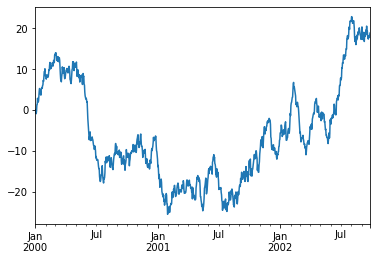

In [177]:
ts.plot()

In [184]:
df = pd.DataFrame(
        np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
    )
df = df.cumsum()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

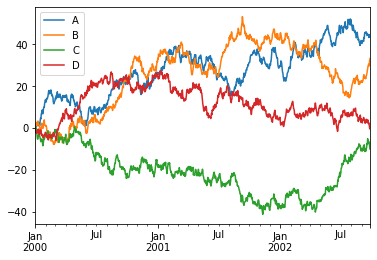

In [185]:
df.plot()

No handles with labels found to put in legend.


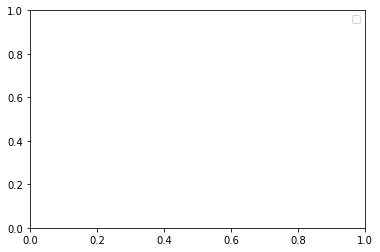

In [192]:
plt.legend(loc = 'best')